In [ ]:
import io
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Load both datasets (with bad line skipping)
df1 = pd.read_csv('/content/drive/My Drive/health_band_readings.csv')
df2 = pd.read_csv('/content/drive/My Drive/health_band_readings.csv')

# Reset index
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
print(df1.columns)


# Merge and align by index
# Merge both datasets (based on index, since no unique key is provided)
merged_df = pd.concat([df2, df1[['Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)']]], axis=1)

# Add synthetic UV Rate
np.random.seed(42)
merged_df['UV Rate'] = np.clip(np.random.normal(loc=5.5, scale=2.0, size=len(merged_df)), 0, 11).round(2)


Index(['Time (s)', 'SpO2 (%)', 'Heart Rate (bpm)', 'IR Value', 'Red Value',
       'Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)'],
      dtype='object')


In [ ]:
# Generate synthetic samples
num_samples = 1000
synthetic_data = merged_df.sample(n=num_samples, replace=True).copy()

# Add noise to numeric columns
for col in ['SpO2 (%)', 'Heart Rate (bpm)', 'Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)', 'UV Rate']:
    if col in synthetic_data.columns:
        try:
            noise = np.random.normal(0, 0.5, size=synthetic_data[col].shape)
            synthetic_data[col] = pd.to_numeric(synthetic_data[col], errors='coerce') + noise
        except Exception as e:
            print(f"Could not add noise to {col}: {e}")

# Clean and round
synthetic_data.reset_index(drop=True, inplace=True)
synthetic_data = synthetic_data.round(2)

# Combine with original
augmented_df = pd.concat([merged_df, synthetic_data], ignore_index=True)

# Save it
augmented_df.to_csv("augmented_health_dataset.csv", index=False)

print("✅ Augmented dataset generated successfully!")


Could not add noise to Accel X (m/s^2): arg must be a list, tuple, 1-d array, or Series
Could not add noise to Accel Y (m/s^2): arg must be a list, tuple, 1-d array, or Series
Could not add noise to Accel Z (m/s^2): arg must be a list, tuple, 1-d array, or Series
✅ Augmented dataset generated successfully!


In [ ]:
# Step 2: Create synthetic data matching the number of rows in df2
num_samples = len(df2)
synthetic_data = pd.DataFrame()

# Add a synthetic 'UV Rate' (simulating random UV index between 0 and 12)
np.random.seed(42)  # for reproducibility
synthetic_data['UV Rate'] = np.random.uniform(0, 12, size=num_samples)

# Merge df2 with only matching features (we skip df1 here for simplicity)
synthetic_data = pd.concat([df2.reset_index(drop=True), synthetic_data], axis=1)

# Step 3: Clean acceleration values (if they are strings like "[0.12 0.34 0.56]")
for col in ['Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)']:
    if col in synthetic_data.columns:
        synthetic_data[col] = (
            synthetic_data[col]
            .astype(str)
            .str.extract(r'([-+]?[0-9]*\.?[0-9]+)')[0]  # extract first numeric
            .astype(float)
        )

# Step 4: Add noise to key numeric fields
for col in ['SpO2 (%)', 'Heart Rate (bpm)', 'Accel X (m/s^2)',
            'Accel Y (m/s^2)', 'Accel Z (m/s^2)', 'UV Rate']:
    if col in synthetic_data.columns:
        try:
            noise = np.random.normal(0, 0.5, size=synthetic_data[col].shape)
            synthetic_data[col] += noise
        except Exception as e:
            print(f"Could not add noise to {col}: {e}")

# Step 5: Save final dataset
synthetic_data.to_csv("augmented_health_band_data.csv", index=False)
print("✅ Augmented dataset generated and saved as 'augmented_health_band_data.csv'")

✅ Augmented dataset generated and saved as 'augmented_health_band_data.csv'


In [ ]:
# Step 2: Create synthetic data matching the number of rows in df2
num_samples = len(df2)
synthetic_data = pd.DataFrame()

# Step 3: Copy core health-band data
synthetic_data = df2.reset_index(drop=True)

# Step 4: Add synthetic 'UV Rate' (range 0 to 12 for UV index)
np.random.seed(42)
synthetic_data['UV Rate'] = np.random.uniform(0, 12, size=num_samples)

# Step 5: Add synthetic 'Gyro X', 'Gyro Y', 'Gyro Z' values (degrees/sec)
synthetic_data['Gyro X (°/s)'] = np.random.normal(0, 50, size=num_samples)
synthetic_data['Gyro Y (°/s)'] = np.random.normal(0, 50, size=num_samples)
synthetic_data['Gyro Z (°/s)'] = np.random.normal(0, 50, size=num_samples)

# Step 6: Add synthetic 'Body Temperature (°C)' (between 36.0°C to 38.5°C)
synthetic_data['Body Temp (°C)'] = np.random.normal(36.8, 0.5, size=num_samples)

# Step 7: Clean acceleration values (in case they are strings like "[0.12 0.34 0.56]")
for col in ['Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)']:
    if col in synthetic_data.columns:
        synthetic_data[col] = (
            synthetic_data[col]
            .astype(str)
            .str.extract(r'([-+]?[0-9]*\.?[0-9]+)')[0]
            .astype(float)
        )

# Step 8: Add small noise to simulate new readings
for col in ['SpO2 (%)', 'Heart Rate (bpm)', 'Accel X (m/s^2)',
            'Accel Y (m/s^2)', 'Accel Z (m/s^2)', 'UV Rate',
            'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Body Temp (°C)']:
    if col in synthetic_data.columns:
        try:
            noise = np.random.normal(0, 0.5, size=synthetic_data[col].shape)
            synthetic_data[col] += noise
        except Exception as e:
            print(f"Could not add noise to {col}: {e}")

# Step 9: Save the final synthetic dataset
synthetic_data.to_csv("complete_healthband_dataset.csv", index=False)
print("✅ Final dataset with gyroscope, body temperature, and UV rate saved as 'complete_healthband_dataset.csv'")

✅ Final dataset with gyroscope, body temperature, and UV rate saved as 'complete_healthband_dataset.csv'


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('complete_healthband_dataset.csv')

# Step 2: Generate random age values between 18 and 90
ages = np.random.randint(18, 90, size=len(df))

# Step 3: Insert the Age column after the "Time (s)" column
df.insert(loc=df.columns.get_loc('Time (s)') + 1, column='Age', value=ages)

# Step 4: Display the first few rows to confirm
df.head()


,Time (s),Age,SpO2 (%),Heart Rate (bpm),IR Value,Red Value,Accel X (m/s^2),Accel Y (m/s^2),Accel Z (m/s^2),UV Rate,Gyro X (°/s),Gyro Y (°/s),Gyro Z (°/s),Body Temp (°C)
0,0,30,98.198781,75.748334,53812.52,51748.40,-0.317389,0.745340,8.742869,5.025164,-0.508005,-4.348929,78.924119,37.615172
1,1,87,96.684558,94.780630,58730.69,58918.98,-0.512327,0.550623,9.941633,11.321112,60.418464,75.291782,-37.360917,36.158286
2,2,28,99.441363,88.838206,54522.53,50766.90,0.782261,0.675553,10.056615,8.809588,31.212191,-79.925220,-18.981872,37.081527
3,3,86,95.389850,63.092013,58543.23,50466.21,-0.870726,-0.155307,9.225347,7.011678,-39.948618,9.355200,68.746907,37.692988
4,4,68,95.159259,83.896672,52571.98,54985.53,-0.438775,0.711295,9.934161,2.054155,88.816928,-48.356043,83.643075,36.162242


In [ ]:
# Save the updated DataFrame to a CSV file
df.to_csv('Health_Monitoring_Dataset.csv', index=False)


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Health_Monitoring_Dataset.csv")

# View first 5 rows
print(df.head())


   Time (s)  Age   SpO2 (%)  Heart Rate (bpm)  IR Value  Red Value  \
0         0   30  98.198781         75.748334  53812.52   51748.40   
1         1   87  96.684558         94.780630  58730.69   58918.98   
2         2   28  99.441363         88.838206  54522.53   50766.90   
3         3   86  95.389850         63.092013  58543.23   50466.21   
4         4   68  95.159259         83.896672  52571.98   54985.53   

   Accel X (m/s^2)  Accel Y (m/s^2)  Accel Z (m/s^2)    UV Rate  Gyro X (°/s)  \
0        -0.317389         0.745340         8.742869   5.025164     -0.508005   
1        -0.512327         0.550623         9.941633  11.321112     60.418464   
2         0.782261         0.675553        10.056615   8.809588     31.212191   
3        -0.870726        -0.155307         9.225347   7.011678    -39.948618   
4        -0.438775         0.711295         9.934161   2.054155     88.816928   

   Gyro Y (°/s)  Gyro Z (°/s)  Body Temp (°C)  
0     -4.348929     78.924119       37.61517

In [ ]:
# Check for missing data
print(df.isnull().sum())

# Optionally drop or fill missing values
df = df.dropna()  # or df.fillna(method="ffill")


Time (s)            0
Age                 0
SpO2 (%)            0
Heart Rate (bpm)    0
IR Value            0
Red Value           0
Accel X (m/s^2)     0
Accel Y (m/s^2)     0
Accel Z (m/s^2)     0
UV Rate             0
Gyro X (°/s)        0
Gyro Y (°/s)        0
Gyro Z (°/s)        0
Body Temp (°C)      0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (s)          50000 non-null  int64  
 1   Age               50000 non-null  int64  
 2   SpO2 (%)          50000 non-null  float64
 3   Heart Rate (bpm)  50000 non-null  float64
 4   IR Value          50000 non-null  float64
 5   Red Value         50000 non-null  float64
 6   Accel X (m/s^2)   50000 non-null  float64
 7   Accel Y (m/s^2)   50000 non-null  float64
 8   Accel Z (m/s^2)   50000 non-null  float64
 9   UV Rate           50000 non-null  float64
 10  Gyro X (°/s)      50000 non-null  float64
 11  Gyro Y (°/s)      50000 non-null  float64
 12  Gyro Z (°/s)      50000 non-null  float64
 13  Body Temp (°C)    50000 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 5.3 MB
None
           Time (s)           Age      SpO2 (%)  Heart Rate (bpm)  \
count  50000.0

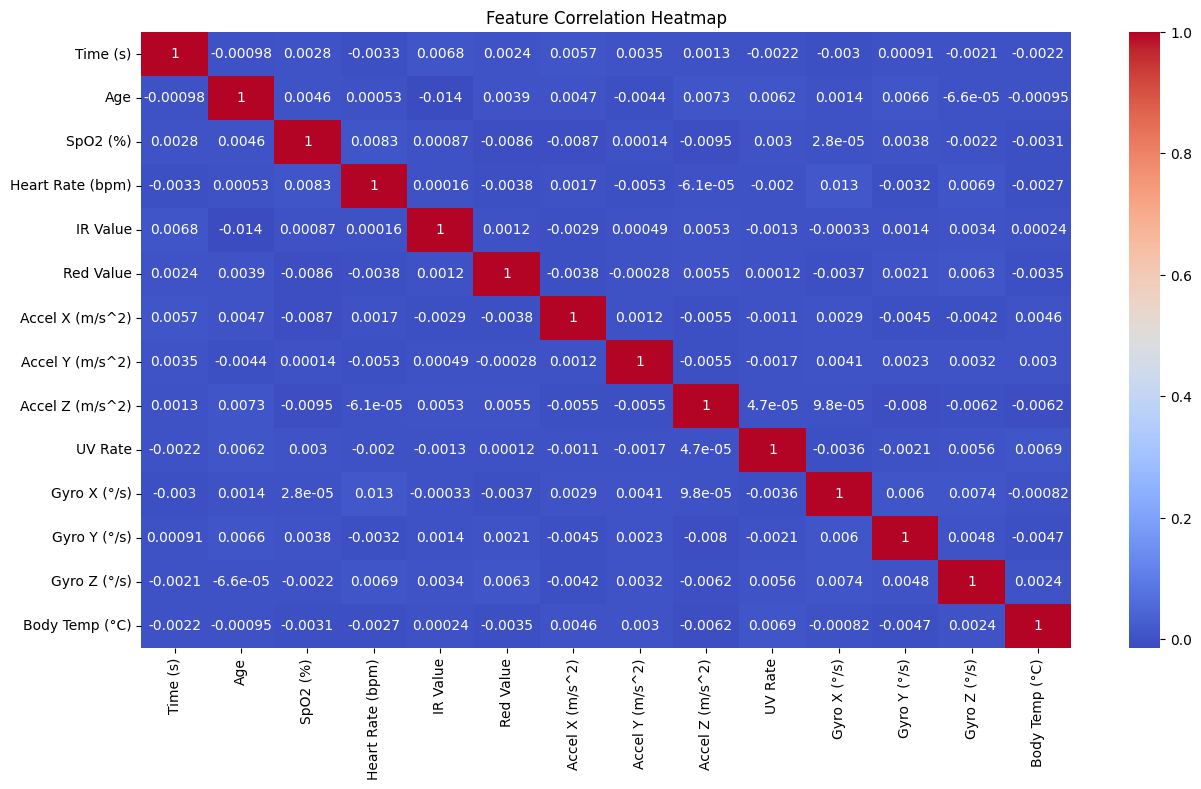

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Health_Monitoring_Dataset.csv')

# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
def assign_health_risk_fixed(row):
    spo2 = row['SpO2 (%)']
    hr = row['Heart Rate (bpm)']
    temp = row['Body Temp (°C)']
    uv = row['UV Rate']
    accel = max(abs(row['Accel X (m/s^2)']), abs(row['Accel Y (m/s^2)']), abs(row['Accel Z (m/s^2)']))
    gyro = max(abs(row['Gyro X (°/s)']), abs(row['Gyro Y (°/s)']), abs(row['Gyro Z (°/s)']))
    age = row['Age']

    # Adjusted thresholds
    if spo2 < 95 or hr < 60 or hr > 100 or temp > 38.5 or uv > 11 or gyro > 180 or age > 80:
        return 2  # High Risk
    elif spo2 < 97 or hr < 65 or hr > 90 or temp > 37.5 or uv > 8 or gyro > 100 or age > 60:
        return 1  # Medium Risk
    else:
        return 0  # Low Risk

# Re-assign labels
df['Health_Risk'] = df.apply(assign_health_risk_fixed, axis=1)
print(df['Health_Risk'].value_counts())


Health_Risk
1    32413
2    12109
0     5478
Name: count, dtype: int64


In [ ]:
df.to_csv('Updated_Health_Monitoring_Dataset.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

# Load the existing dataset
df = pd.read_csv('Updated_Health_Monitoring_Dataset.csv')

# Step 1: Generate synthetic blood pressure data (for example, systolic and diastolic values)
np.random.seed(42)
df['Systolic BP (mmHg)'] = np.random.randint(90, 180, size=len(df))
df['Diastolic BP (mmHg)'] = np.random.randint(60, 120, size=len(df))

# Step 2: Reorder columns so blood pressure comes after heart rate
# Assuming the 'Heart Rate' column exists in the dataset
heart_rate_index = df.columns.get_loc('Heart Rate (bpm)')
cols = list(df.columns)

# Insert the new columns (Systolic and Diastolic BP) after the 'Heart Rate' column
cols.insert(heart_rate_index + 1, cols.pop(cols.index('Systolic BP (mmHg)')))
cols.insert(heart_rate_index + 2, cols.pop(cols.index('Diastolic BP (mmHg)')))

# Reorder the dataframe with the updated column order
df = df[cols]

# Step 3: Display the first few rows to confirm the addition
print(df.head())

# Step 4: Save the updated DataFrame to a new CSV file
df.to_csv('Health_Alert_System.csv', index=False)

print("✅ Blood Pressure data added successfully after Heart Rate and saved.")


   Time (s)  Age   SpO2 (%)  Heart Rate (bpm)  Systolic BP (mmHg)  \
0         0   30  98.198781         75.748334                 141   
1         1   87  96.684558         94.780630                 104   
2         2   28  99.441363         88.838206                 161   
3         3   86  95.389850         63.092013                 150   
4         4   68  95.159259         83.896672                 110   

   Diastolic BP (mmHg)  IR Value  Red Value  Accel X (m/s^2)  Accel Y (m/s^2)  \
0                  116  53812.52   51748.40        -0.317389         0.745340   
1                  101  58730.69   58918.98        -0.512327         0.550623   
2                   68  54522.53   50766.90         0.782261         0.675553   
3                   72  58543.23   50466.21        -0.870726        -0.155307   
4                  102  52571.98   54985.53        -0.438775         0.711295   

   Accel Z (m/s^2)    UV Rate  Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)  \
0         8.742869   5.

In [ ]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
X = df.drop(['Time (s)', 'IR Value', 'Red Value', 'Health_Risk'], axis=1)
y = df['Health_Risk']


['Time (s)', 'Age', 'SpO2 (%)', 'Heart Rate (bpm)', 'Systolic BP (mmHg)', 'Diastolic BP (mmHg)', 'IR Value', 'Red Value', 'Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)', 'UV Rate', 'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Body Temp (°C)', 'Health_Risk']


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load the dataset
df = pd.read_csv('Health_Alert_System.csv')

# Define features and target
X = df.drop(['Time (s)', 'IR Value', 'Red Value', 'Health_Risk'], axis=1)
y = df['Health_Risk']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Tune Random Forest and Decision Tree to prevent overfitting
rf = RandomForestClassifier(
    n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(
    max_depth=8, class_weight='balanced', random_state=42)

# Create hybrid model
hybrid_model = VotingClassifier(estimators=[
    ('random_forest', rf),
    ('decision_tree', dt)
], voting='soft')

# Train the model
hybrid_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = hybrid_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Save the model
with open('hybrid_health_alert_model.pkl', 'wb') as f:
    pickle.dump(hybrid_model, f)

# Save the feature column names
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)


Classification Report:
               precision    recall  f1-score   support

           0     0.8568    1.0000    0.9229      1095
           1     0.9962    0.9719    0.9839      6483
           2     1.0000    0.9897    0.9948      2422

    accuracy                         0.9793     10000
   macro avg     0.9510    0.9872    0.9672     10000
weighted avg     0.9819    0.9793    0.9799     10000

Accuracy: 0.9793


In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('Health_Alert_System.csv')

# Define features and target
X = df.drop(['Time (s)', 'IR Value', 'Red Value', 'Health_Risk'], axis=1)
y = df['Health_Risk']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# ================= KNN =================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn, digits=4))
print("KNN Accuracy:", round(accuracy_score(y_test, y_pred_knn), 4))
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)




KNN Classification Report:
               precision    recall  f1-score   support

           0     0.2849    0.2274    0.2529      1095
           1     0.7097    0.8598    0.7776      6483
           2     0.6855    0.3600    0.4721      2422

    accuracy                         0.6695     10000
   macro avg     0.5600    0.4824    0.5009     10000
weighted avg     0.6573    0.6695    0.6461     10000

KNN Accuracy: 0.6695


In [ ]:
# ================= SVM =================
svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, digits=4))
print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm), 4))
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle



# ========== Random Forest (Weaker Settings) ==========
rf = RandomForestClassifier(n_estimators=10, max_depth=3, class_weight=None, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest (Weaker) Classification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
with open('random_forest_weak_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# ========== Decision Tree (Weaker Settings) ==========
dt = DecisionTreeClassifier(max_depth=3, class_weight=None, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree (Weaker) Classification Report:\n", classification_report(y_test, y_pred_dt, digits=4))
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
with open('decision_tree_weak_model.pkl', 'wb') as f:
    pickle.dump(dt, f)

# Save feature columns again if needed
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)


In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv('Health_Alert_System.csv')

# Feature and label
X = df.drop(['Time (s)', 'IR Value', 'Red Value', 'Health_Risk'], axis=1)
y = df['Health_Risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# ================= Naive Bayes =================
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb, digits=4))
print("Naive Bayes Accuracy:", round(accuracy_score(y_test, y_pred_nb), 4))
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb, f)

# ================= Logistic Regression =================
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr, digits=4))
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# ================= Gradient Boosting (<97%) =================
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.3, max_depth=2, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting Report:\n", classification_report(y_test, y_pred_gb, digits=4))
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 4))
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb, f)

# ================= XGBoost (<97%) =================
xgb = XGBClassifier(n_estimators=30, learning_rate=0.3, max_depth=2, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Report:\n", classification_report(y_test, y_pred_xgb, digits=4))
print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# Save feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)



Naive Bayes Report:
               precision    recall  f1-score   support

           0     0.9031    0.3406    0.4947      1095
           1     0.7348    0.9664    0.8348      6483
           2     0.8322    0.3646    0.5070      2422

    accuracy                         0.7521     10000
   macro avg     0.8234    0.5572    0.6122     10000
weighted avg     0.7768    0.7521    0.7182     10000

Naive Bayes Accuracy: 0.7521


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Report:
               precision    recall  f1-score   support

           0     0.5101    0.1845    0.2710      1095
           1     0.7147    0.8882    0.7921      6483
           2     0.6537    0.4178    0.5098      2422

    accuracy                         0.6972     10000
   macro avg     0.6262    0.4968    0.5243     10000
weighted avg     0.6776    0.6972    0.6667     10000

Logistic Regression Accuracy: 0.6972

Gradient Boosting Report:
               precision    recall  f1-score   support

           0     0.9707    0.9991    0.9847      1095
           1     0.9989    0.9951    0.9970      6483
           2     1.0000    0.9971    0.9986      2422

    accuracy                         0.9960     10000
   macro avg     0.9899    0.9971    0.9934     10000
weighted avg     0.9961    0.9960    0.9960     10000

Gradient Boosting Accuracy: 0.996


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:17:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Report:
               precision    recall  f1-score   support

           0     0.8555    1.0000    0.9221      1095
           1     0.9915    0.9716    0.9815      6483
           2     1.0000    0.9773    0.9885      2422

    accuracy                         0.9761     10000
   macro avg     0.9490    0.9830    0.9640     10000
weighted avg     0.9787    0.9761    0.9767     10000

XGBoost Accuracy: 0.9761


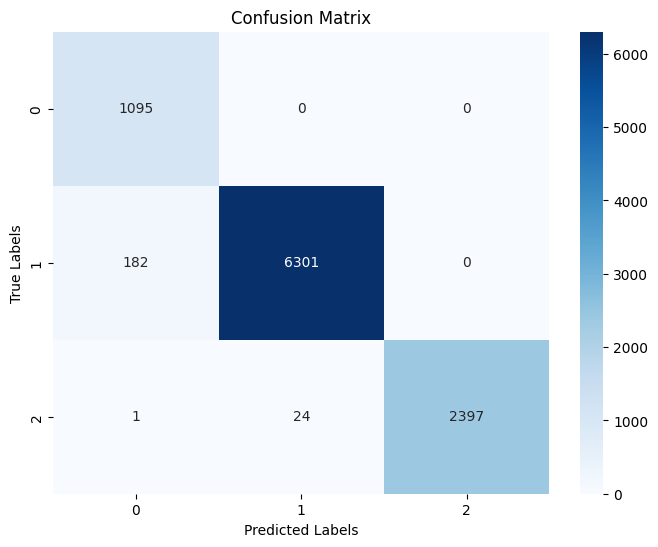

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === CONFUSION MATRIX ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=hybrid_model.classes_, yticklabels=hybrid_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


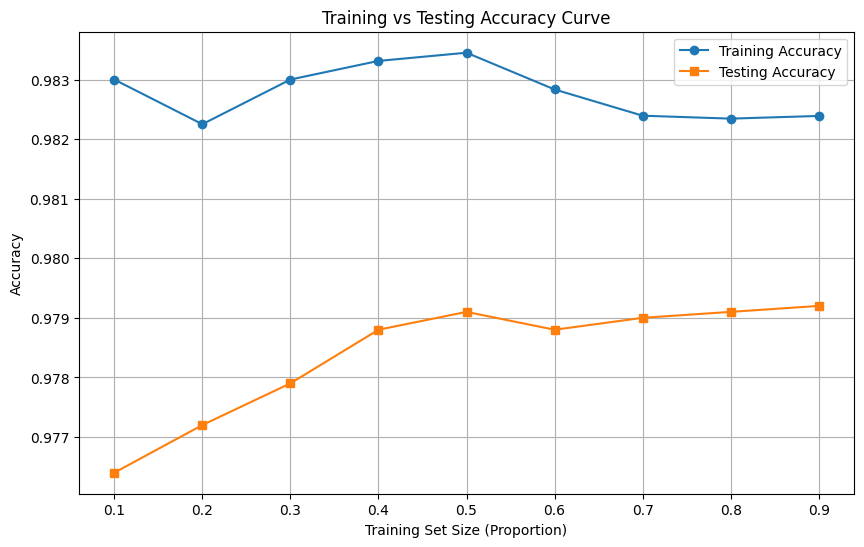

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# --- Training vs Testing Accuracy Curve ---
train_sizes = np.linspace(0.1, 0.9, 9)  # Avoid 1.0 to prevent error
train_accuracies = []
test_accuracies = []

for size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(
        X_train, y_train, train_size=size, stratify=y_train, random_state=42)

    hybrid_model.fit(X_train_part, y_train_part)

    train_pred = hybrid_model.predict(X_train_part)
    test_pred = hybrid_model.predict(X_test)

    train_accuracies.append(accuracy_score(y_train_part, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Training Set Size (Proportion)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Defining thresholds for each parameter including blood pressure
def generate_alert(row):
    if row['SpO2 (%)'] < 95:  # SpO2 alert condition
        return 'Alert'
    elif row['Heart Rate (bpm)'] < 60 or row['Heart Rate (bpm)'] > 100:  # Heart Rate alert condition
        return 'Alert'
    elif row['Systolic BP (mmHg)'] < 90 or row['Systolic BP (mmHg)'] > 140:  # Systolic BP alert condition
        return 'Alert'
    elif row['Diastolic BP (mmHg)'] < 60 or row['Diastolic BP (mmHg)'] > 90:  # Diastolic BP alert condition
        return 'Alert'
    elif row['Body Temp (°C)'] < 36.8 or row['Body Temp (°C)'] > 38:  # Body Temperature alert condition
        return 'Alert'
    elif abs(row['Accel X (m/s^2)']) > 2 or abs(row['Accel Y (m/s^2)']) > 2 or abs(row['Accel Z (m/s^2)']) > 2:  # Acceleration alert condition
        return 'Alert'
    elif row['UV Rate'] > 10:  # UV Rate alert condition
        return 'Alert'
    elif abs(row['Gyro X (°/s)']) > 100 or abs(row['Gyro Y (°/s)']) > 100 or abs(row['Gyro Z (°/s)']) > 100:  # Gyro alert condition
        return 'Alert'
    else:
        return 'Normal'

# Apply the updated function
df['alert_flag'] = df.apply(generate_alert, axis=1)

# Display the updated dataframe
print(df.head())


   Time (s)  Age   SpO2 (%)  Heart Rate (bpm)  Systolic BP (mmHg)  \
0         0   30  98.198781         75.748334                 141   
1         1   87  96.684558         94.780630                 104   
2         2   28  99.441363         88.838206                 161   
3         3   86  95.389850         63.092013                 150   
4         4   68  95.159259         83.896672                 110   

   Diastolic BP (mmHg)  IR Value  Red Value  Accel X (m/s^2)  Accel Y (m/s^2)  \
0                  116  53812.52   51748.40        -0.317389         0.745340   
1                  101  58730.69   58918.98        -0.512327         0.550623   
2                   68  54522.53   50766.90         0.782261         0.675553   
3                   72  58543.23   50466.21        -0.870726        -0.155307   
4                  102  52571.98   54985.53        -0.438775         0.711295   

   Accel Z (m/s^2)    UV Rate  Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)  \
0         8.742869   5.

In [ ]:
import pandas as pd

# Define thresholds for alerting including BP
def alert_flag(row):
    # Define the alerting conditions for each parameter
    if (row['SpO2 (%)'] < 95 or row['SpO2 (%)'] > 100 or
        row['Heart Rate (bpm)'] < 60 or row['Heart Rate (bpm)'] > 100 or
        row['Systolic BP (mmHg)'] < 90 or row['Systolic BP (mmHg)'] > 140 or
        row['Diastolic BP (mmHg)'] < 60 or row['Diastolic BP (mmHg)'] > 90 or
        row['Body Temp (°C)'] < 36.8 or row['Body Temp (°C)'] > 38 or
        abs(row['Accel X (m/s^2)']) > 15 or abs(row['Accel Y (m/s^2)']) > 15 or abs(row['Accel Z (m/s^2)']) > 15 or
        abs(row['Gyro X (°/s)']) > 200 or abs(row['Gyro Y (°/s)']) > 200 or abs(row['Gyro Z (°/s)']) > 200 or
        row['UV Rate'] > 10):
        return 1  # Flag as alert
    else:
        return 0  # No alert

# Apply the alert function to each row in the dataframe
df['alert_flag'] = df.apply(alert_flag, axis=1)

# Print the dataframe with selected columns including BP and alert flag
print(df[['Time (s)', 'SpO2 (%)', 'Heart Rate (bpm)', 'Systolic BP (mmHg)', 'Diastolic BP (mmHg)',
          'Body Temp (°C)', 'Accel X (m/s^2)', 'Accel Y (m/s^2)', 'Accel Z (m/s^2)',
          'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'UV Rate', 'alert_flag']])


       Time (s)   SpO2 (%)  Heart Rate (bpm)  Systolic BP (mmHg)  \
0             0  98.198781         75.748334                 141   
1             1  96.684558         94.780630                 104   
2             2  99.441363         88.838206                 161   
3             3  95.389850         63.092013                 150   
4             4  95.159259         83.896672                 110   
...         ...        ...               ...                 ...   
49995     49995  95.142455         62.573955                 176   
49996     49996  99.416769         68.307170                 124   
49997     49997  94.518560         79.089122                 141   
49998     49998  97.124866         92.055218                 135   
49999     49999  99.007343         83.418844                 155   

       Diastolic BP (mmHg)  Body Temp (°C)  Accel X (m/s^2)  Accel Y (m/s^2)  \
0                      116       37.615172        -0.317389         0.745340   
1                      

In [ ]:
# Count the number of alerts for each parameter, including BP
alert_summary = {
    'SpO2 (%)': (df['SpO2 (%)'] < 95) | (df['SpO2 (%)'] > 100),
    'Heart Rate (bpm)': (df['Heart Rate (bpm)'] < 60) | (df['Heart Rate (bpm)'] > 100),
    'Systolic BP (mmHg)': (df['Systolic BP (mmHg)'] < 90) | (df['Systolic BP (mmHg)'] > 140),
    'Diastolic BP (mmHg)': (df['Diastolic BP (mmHg)'] < 60) | (df['Diastolic BP (mmHg)'] > 90),
    'Body Temp (°C)': (df['Body Temp (°C)'] < 36.8) | (df['Body Temp (°C)'] > 38),
    'Accel X (m/s^2)': abs(df['Accel X (m/s^2)']) > 15,
    'Accel Y (m/s^2)': abs(df['Accel Y (m/s^2)']) > 15,
    'Accel Z (m/s^2)': abs(df['Accel Z (m/s^2)']) > 15,
    'Gyro X (°/s)': abs(df['Gyro X (°/s)']) > 200,
    'Gyro Y (°/s)': abs(df['Gyro Y (°/s)']) > 200,
    'Gyro Z (°/s)': abs(df['Gyro Z (°/s)']) > 200,
    'UV Rate': df['UV Rate'] > 10
}

# Print out the alert counts for each parameter
for param, alert_condition in alert_summary.items():
    print(f"Number of alerts for {param}: {alert_condition.sum()}")


Number of alerts for SpO2 (%): 4052
Number of alerts for Heart Rate (bpm): 518
Number of alerts for Systolic BP (mmHg): 21695
Number of alerts for Diastolic BP (mmHg): 24156
Number of alerts for Body Temp (°C): 27174
Number of alerts for Accel X (m/s^2): 0
Number of alerts for Accel Y (m/s^2): 0
Number of alerts for Accel Z (m/s^2): 0
Number of alerts for Gyro X (°/s): 3
Number of alerts for Gyro Y (°/s): 2
Number of alerts for Gyro Z (°/s): 3
Number of alerts for UV Rate: 8266


In [ ]:
# Adding a critical alert flag if more than 2 parameters exceed safe thresholds including BP
df['critical_alert'] = df.apply(
    lambda row: 1 if (
        ((row['SpO2 (%)'] < 95) | (row['SpO2 (%)'] > 100)) +
        ((row['Heart Rate (bpm)'] < 60) | (row['Heart Rate (bpm)'] > 100)) +
        ((row['Systolic BP (mmHg)'] < 90) | (row['Systolic BP (mmHg)'] > 140)) +
        ((row['Diastolic BP (mmHg)'] < 60) | (row['Diastolic BP (mmHg)'] > 90)) +
        ((row['Body Temp (°C)'] < 36.8) | (row['Body Temp (°C)'] > 38)) +
        (abs(row['Accel X (m/s^2)']) > 15) +
        (abs(row['Accel Y (m/s^2)']) > 15) +
        (abs(row['Accel Z (m/s^2)']) > 15) +
        (abs(row['Gyro X (°/s)']) > 200) +
        (abs(row['Gyro Y (°/s)']) > 200) +
        (abs(row['Gyro Z (°/s)']) > 200) +
        (row['UV Rate'] > 10)
    ) > 2 else 0, axis=1
)

# Display the updated DataFrame with critical alerts
print(df[['Time (s)', 'alert_flag', 'critical_alert']].head())


   Time (s)  alert_flag  critical_alert
0         0           1               0
1         1           1               0
2         2           1               0
3         3           1               0
4         4           1               0


In [ ]:


# Step 1: Define alert logic using Fahrenheit and BP thresholds
def flag_alert(row):
    if (
        row['SpO2 (%)'] < 92 or
        row['Heart Rate (bpm)'] < 60 or row['Heart Rate (bpm)'] > 100 or
        row['Systolic BP (mmHg)'] < 90 or row['Systolic BP (mmHg)'] > 140 or
        row['Diastolic BP (mmHg)'] < 60 or row['Diastolic BP (mmHg)'] > 90 or
        row['Body Temp (°C)'] < 36.8 or row['Body Temp (°C)'] > 38
    ):
        return 1  # Alert
    return 0  # Normal

# Apply the function to generate alert flags
df['alert_flag'] = df.apply(flag_alert, axis=1)


In [ ]:
!pip install streamlit
!pip install streamlit pyngrok



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained health model
model = joblib.load("hybrid_health_alert_model.pkl")

st.set_page_config(page_title="Health Alert Chatbot", layout="centered")
st.title("🩺 Health Monitoring Chatbot with Fall Detection")

st.sidebar.header("Enter Health Parameters")

# Get user input
age = st.sidebar.number_input("Age", min_value=1, max_value=120, value=30)
spo2 = st.sidebar.slider("SpO2 (%)", 70, 100, 98)
heart_rate = st.sidebar.slider("Heart Rate (bpm)", 40, 180, 75)
systolic_bp = st.sidebar.slider("Systolic BP (mmHg)", 70, 200, 120)
diastolic_bp = st.sidebar.slider("Diastolic BP (mmHg)", 40, 120, 80)
accel_x = st.sidebar.number_input("Accel X (m/s^2)", value=0.0)
accel_y = st.sidebar.number_input("Accel Y (m/s^2)", value=0.0)
accel_z = st.sidebar.number_input("Accel Z (m/s^2)", value=9.8)
uv_rate = st.sidebar.number_input("UV Rate", value=1.0)
gyro_x = st.sidebar.number_input("Gyro X (°/s)", value=0.0)
gyro_y = st.sidebar.number_input("Gyro Y (°/s)", value=0.0)
gyro_z = st.sidebar.number_input("Gyro Z (°/s)", value=0.0)
body_temp_c = st.sidebar.number_input("Body Temp (°C)", value=36.8)

if st.sidebar.button("Check Health Status"):

    # Create input dataframe for the model
    input_data = pd.DataFrame([[
        age, spo2, heart_rate, systolic_bp, diastolic_bp,
        accel_x, accel_y, accel_z, uv_rate,
        gyro_x, gyro_y, gyro_z, body_temp_c
    ]], columns=[
        "Age", "SpO2 (%)", "Heart Rate (bpm)", "Systolic BP (mmHg)", "Diastolic BP (mmHg)",
        "Accel X (m/s^2)", "Accel Y (m/s^2)", "Accel Z (m/s^2)",
        "UV Rate", "Gyro X (°/s)", "Gyro Y (°/s)", "Gyro Z (°/s)",
        "Body Temp (°C)"
    ])

    # Model Prediction (0 = healthy, 1 = mild, 2 = critical)
    prediction = model.predict(input_data)[0]

    # Alert thresholds
    alerts = []

    # Check for abnormal conditions
    if spo2 < 92:
        alerts.append("Low SpO2 (Possible hypoxia)")

    if heart_rate < 60 or heart_rate > 100:
        alerts.append("Abnormal Heart Rate")

    if systolic_bp < 90 or systolic_bp > 140:
        alerts.append("Abnormal Systolic Blood Pressure")

    if diastolic_bp < 60 or diastolic_bp > 90:
        alerts.append("Abnormal Diastolic Blood Pressure")

    if body_temp_c < 36.8 or body_temp_c > 38:
        alerts.append("Abnormal Body Temperature")
        if body_temp_c < 36.8:
            prediction = 1  # Mild Risk
        elif body_temp_c > 38:
            prediction = 2  # Critical

    if abs(accel_x) > 15 or abs(accel_y) > 15 or abs(accel_z) > 15:
        alerts.append("High Acceleration Detected (Possible Fall)")

    if abs(gyro_x) > 200 or abs(gyro_y) > 200 or abs(gyro_z) > 200:
        alerts.append("High Gyroscope Movement (Possible Fall)")

    if uv_rate > 2:
        alerts.append("High UV Exposure")

    # Fall detection logic
    fall_detected = (
        (abs(accel_x) > 20 or abs(accel_y) > 20 or abs(accel_z - 9.8) > 10) and
        (abs(gyro_x) > 300 or abs(gyro_y) > 300 or abs(gyro_z) > 300)
    )

    # Update prediction based on fall detection
    if fall_detected:
        prediction = 2  # Critical

    # Display prediction
    if prediction == 0:
        st.success("✅ You're Healthy! Keep monitoring regularly.")
    elif prediction == 1:
        st.warning("⚠️ Mild Risk Detected. Monitor your health closely.")
    elif prediction == 2:
        st.error("🚨 Critical Condition Detected! Seek immediate medical attention.")

    # Display alerts
    if alerts:
        st.warning("⚠️ Alert Triggers:")
        for item in alerts:
            st.markdown(f"- {item}")

    if fall_detected:
        st.error("🛑 Fall Detected! Immediate attention may be required.")

    # Overall Alert Flag
    if prediction == 2 or fall_detected or len(alerts) >= 2:
        st.markdown("### 🚨 **Critical Alert Raised**")

    st.markdown("---")
    st.write("System continuously monitors for abnormal vitals and potential fall events.")

Writing app.py


In [ ]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py
!ngrok config add-authtoken 2vnWhsksXX9iTvvquZPSkB7GCQN_4o5pv3Y97U1G3zbH5fVtZ




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.254.179:8501

  Stopping...
^C
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:

# Kill any existing tunnels
from pyngrok import ngrok
ngrok.kill()

# Start Streamlit app in the background
import os
import subprocess
import time

# Make sure your Streamlit script is saved as app.py
# If it's somewhere else, change the path accordingly
streamlit_process = subprocess.Popen(["streamlit", "run", "app.py"])

# Wait for Streamlit to start
time.sleep(5)

# Connect ngrok tunnel
public_url = ngrok.connect(addr=8501)
print(f"Your Streamlit app is live at: {public_url}")


Your Streamlit app is live at: NgrokTunnel: "https://362f-34-83-254-179.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok



In [ ]:
!ngrok config add-authtoken 2vnWhsksXX9iTvvquZPSkB7GCQN_4o5pv3Y97U1G3zbH5fVtZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading
from pyngrok import ngrok

# Kill any previous ngrok tunnels (just in case)
ngrok.kill()

# Start Streamlit app in a separate thread
def run_streamlit():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run_streamlit)
thread.start()

# Connect ngrok tunnel to the Streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://8edd-34-83-254-179.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
#Go to the ngrok dashboard:
#👉 https://dashboard.ngrok.com/agents